In [13]:
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
from train_valid_test_loader import load_train_valid_test_datasets



In [ ]:


train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()


model_k2 = CollabFilterOneVectorPerItem(
    n_epochs=200, batch_size=1000, step_size=0.75,
    n_factors=2, alpha=0.0)
model_k10 = CollabFilterOneVectorPerItem(
    n_epochs=200, batch_size=1000, step_size=0.75,
    n_factors=10, alpha=0.0)
model_k50 = CollabFilterOneVectorPerItem(
    n_epochs=200, batch_size=1000, step_size=0.75,
    n_factors=50, alpha=0.0)


model_k2.init_parameter_dict(n_users, n_items, train_tuple)
model_k10.init_parameter_dict(n_users, n_items, train_tuple)
model_k50.init_parameter_dict(n_users, n_items, train_tuple)

model_k2.fit(train_tuple, valid_tuple)
model_k10.fit(train_tuple, valid_tuple)
model_k50.fit(train_tuple, valid_tuple)

model_k2_rmse_train = model_k2.trace_rmse_train
model_k2_rmse_valid = model_k2.trace_rmse_valid

model_k10_rmse_train = model_k10.trace_rmse_train
model_k10_rmse_valid = model_k10.trace_rmse_valid

model_k50_rmse_train = model_k50.trace_rmse_train
model_k50_rmse_valid = model_k50.trace_rmse_valid
model_k10

epoch       0.000 | loss_total     1.33640 | tr RMSE     1.12578 | va RMSE     1.12338 | grad_wrt_mu     0.10917 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     1.22816 | tr RMSE     1.12742 | va RMSE     1.12626 | grad_wrt_mu     0.20095 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     1.26055 | tr RMSE     1.12539 | va RMSE     1.12243 | grad_wrt_mu     0.04128 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.28989 | tr RMSE     1.12659 | va RMSE     1.12338 | grad_wrt_mu     0.20491 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     1.23180 | tr RMSE     1.11499 | va RMSE  

epoch       0.629 | loss_total     1.22844 | tr RMSE     1.08383 | va RMSE     1.08725 | grad_wrt_mu     0.05753 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.757 | loss_total     1.18354 | tr RMSE     1.07687 | va RMSE     1.08108 | grad_wrt_mu     0.00426 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.886 | loss_total     1.12434 | tr RMSE     1.06928 | va RMSE     1.07368 | grad_wrt_mu     0.08699 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.000 | loss_total     1.10146 | tr RMSE     1.06426 | va RMSE     1.06953 | grad_wrt_mu     0.11089 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       1.129 | loss_total     1.08681 | tr RMSE     1.05798 | va RMSE  

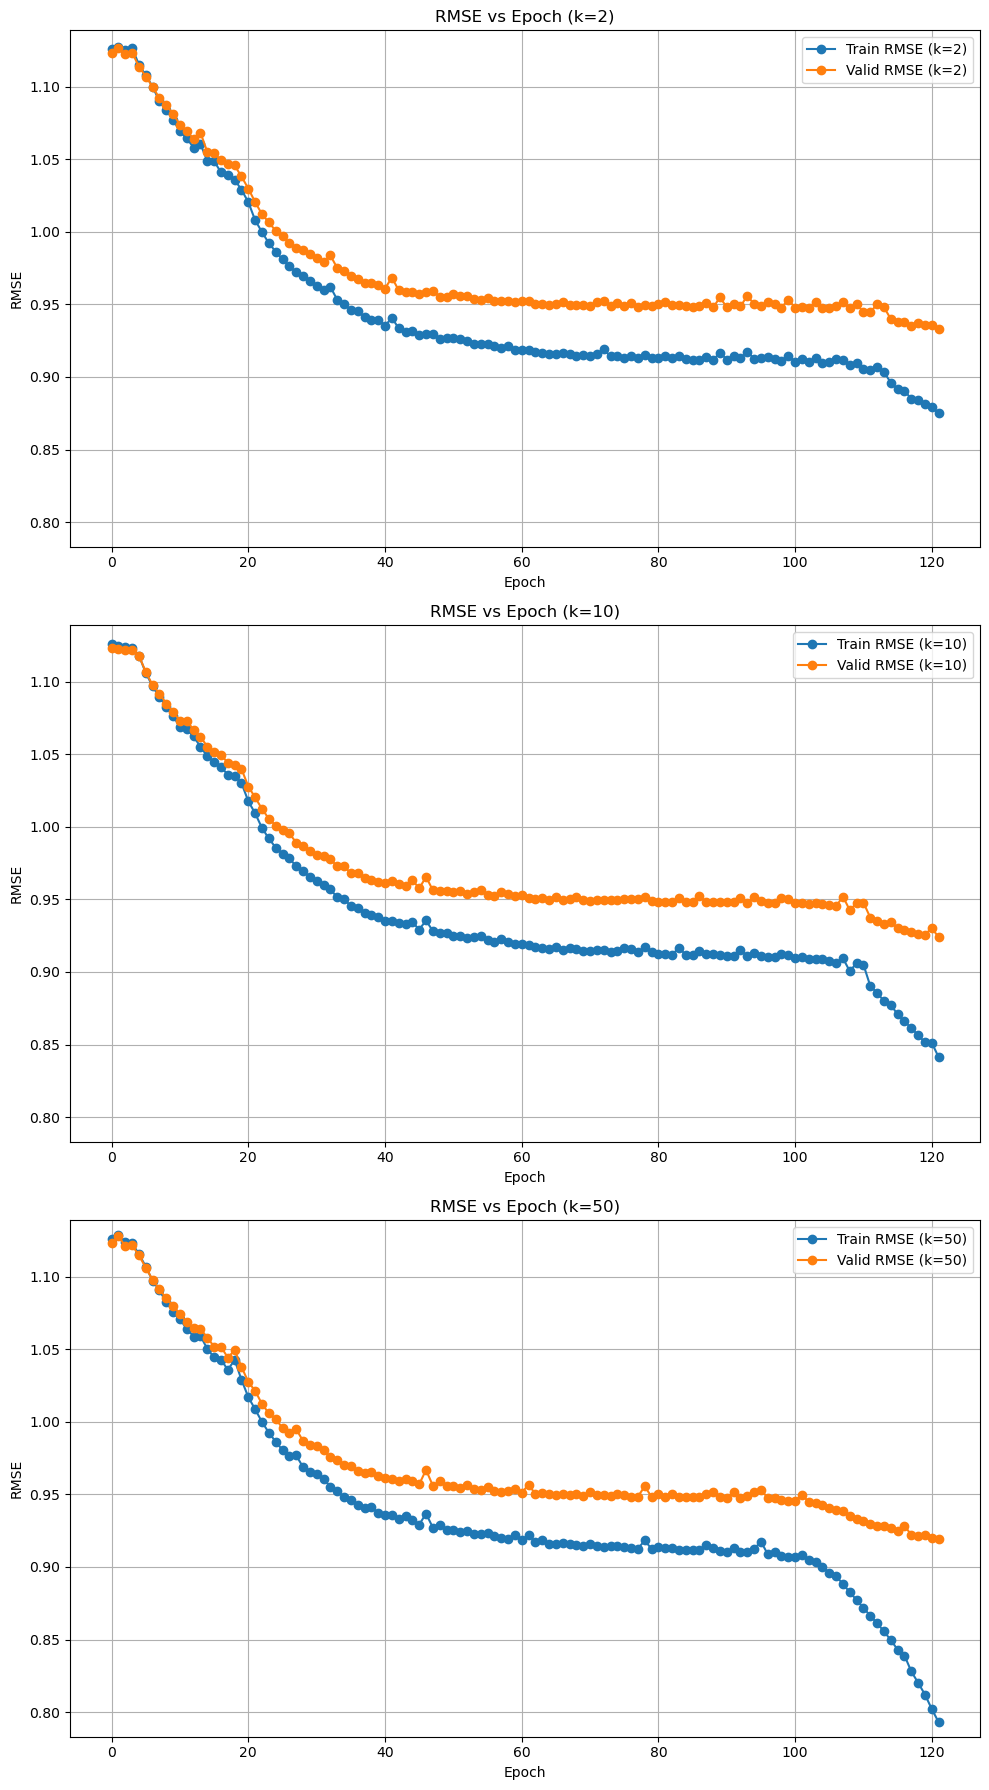

In [15]:
import matplotlib.pyplot as plt
# Determine the global min and max RMSE values for consistent y-axis


padding = 0.01
y_min = min(min(model_k2_rmse_train), min(model_k2_rmse_valid),
            min(model_k10_rmse_train), min(model_k10_rmse_valid),
            min(model_k50_rmse_train), min(model_k50_rmse_valid)) - padding
y_max = max(max(model_k2_rmse_train), max(model_k2_rmse_valid),
            max(model_k10_rmse_train), max(model_k10_rmse_valid),
            max(model_k50_rmse_train), max(model_k50_rmse_valid)) + padding

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))


axes[0].plot(model_k2_rmse_train, label='Train RMSE (k=2)', marker='o')
axes[0].plot(model_k2_rmse_valid, label='Valid RMSE (k=2)', marker='o')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE vs Epoch (k=2)')
axes[0].set_ylim(y_min, y_max)
axes[0].legend()
axes[0].grid()

axes[1].plot(model_k10_rmse_train, label='Train RMSE (k=10)', marker='o')
axes[1].plot(model_k10_rmse_valid, label='Valid RMSE (k=10)', marker='o')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE vs Epoch (k=10)')
axes[1].set_ylim(y_min, y_max)
axes[1].legend()
axes[1].grid()

# Plot for model_k50
axes[2].plot(model_k50_rmse_train, label='Train RMSE (k=50)', marker='o')
axes[2].plot(model_k50_rmse_valid, label='Valid RMSE (k=50)', marker='o')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('RMSE')
axes[2].set_title('RMSE vs Epoch (k=50)')
axes[2].set_ylim(y_min, y_max)
axes[2].legend()
axes[2].grid()

# Adjust layout
plt.tight_layout()
plt.show()




In [16]:
model_k2.predict(test_tuple[0], test_tuple[1], **model_k2.param_dict)

array([2.69480761, 4.12485585, 3.96791901, ..., 4.46914339, 4.38420764,
       3.68330226])

In [17]:
new_model_50 = CollabFilterOneVectorPerItem(step_size=0.75, n_epochs = 100, n_factors=25, alpha=1, random_state = 20190415)

new_model_50.init_parameter_dict(n_users, n_items, train_tuple)
new_model_50.fit(train_tuple, valid_tuple)


epoch       0.000 | loss_total     1.24890 | tr RMSE     1.12578 | va RMSE     1.12338 | grad_wrt_mu     0.07283 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     1.29172 | tr RMSE     1.12590 | va RMSE     1.12295 | grad_wrt_mu     0.06585 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     1.25710 | tr RMSE     1.12343 | va RMSE     1.12120 | grad_wrt_mu     0.13079 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.21709 | tr RMSE     1.12620 | va RMSE     1.12535 | grad_wrt_mu     0.19392 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     1.27645 | tr RMSE     1.11662 | va RMSE  

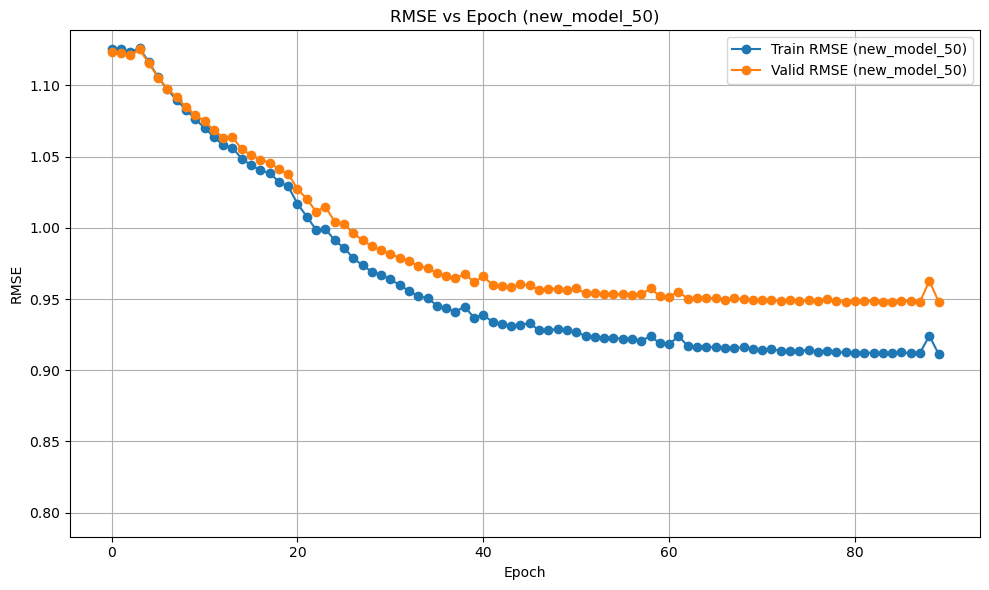

In [18]:
valid = new_model_50.trace_rmse_valid
train = new_model_50.trace_rmse_train
# Create a new figure for the new plot
fig_new, ax_new = plt.subplots(figsize=(10, 6))

# Plot the RMSE for the new model
ax_new.plot(train, label='Train RMSE (new_model_50)', marker='o')
ax_new.plot(valid, label='Valid RMSE (new_model_50)', marker='o')

# Set labels, title, and legend
ax_new.set_xlabel('Epoch')
ax_new.set_ylabel('RMSE')
ax_new.set_title('RMSE vs Epoch (new_model_50)')
ax_new.set_ylim(y_min, y_max)
ax_new.legend()
ax_new.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
model_k10.

SyntaxError: invalid syntax (2862150048.py, line 1)